In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1721 images belonging to 3 classes.


In [4]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [6]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=54,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 101s 2s/step - loss: 0.8966 - accuracy: 0.4896 - val_loss: 0.7960 - val_accuracy: 0.5781
Epoch 2/20
47/47 [==============================] - 81s 2s/step - loss: 0.6812 - accuracy: 0.6740 - val_loss: 0.5409 - val_accuracy: 0.7344
Epoch 3/20
47/47 [==============================] - 87s 2s/step - loss: 0.4170 - accuracy: 0.8216 - val_loss: 0.4329 - val_accuracy: 0.7969
Epoch 4/20
47/47 [==============================] - 82s 2s/step - loss: 0.3149 - accuracy: 0.8751 - val_loss: 0.3359 - val_accuracy: 0.8646
Epoch 5/20
47/47 [==============================] - 80s 2s/step - loss: 0.3197 - accuracy: 0.8717 - val_loss: 0.3973 - val_accuracy: 0.8698
Epoch 6/20
47/47 [==============================] - 88s 2s/step - loss: 0.2462 - accuracy: 0.9045 - val_loss: 0.2934 - val_accuracy: 0.8958
Epoch 7/20
47/47 [==============================] - 83s 2s/step - loss: 0.1743 - accuracy: 0.9312 - val_loss: 0.1643 - val_accuracy: 0.9375
Epoch 8/20
47/47 [=

In [14]:
scores = model.evaluate(test_generator)
scores

7/7 [==============================] - 5s 672ms/step - loss: 0.1125 - accuracy: 0.9769


[0.11254726350307465, 0.9768518805503845]

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [16]:
val_acc

[0.578125,
 0.734375,
 0.796875,
 0.8645833134651184,
 0.8697916865348816,
 0.8958333134651184,
 0.9375,
 0.9583333134651184,
 0.9322916865348816,
 0.9375,
 0.9635416865348816,
 0.9427083134651184,
 0.9583333134651184,
 0.9270833134651184,
 0.9375,
 0.9635416865348816,
 0.96875,
 0.9166666865348816,
 0.9479166865348816,
 0.9635416865348816]

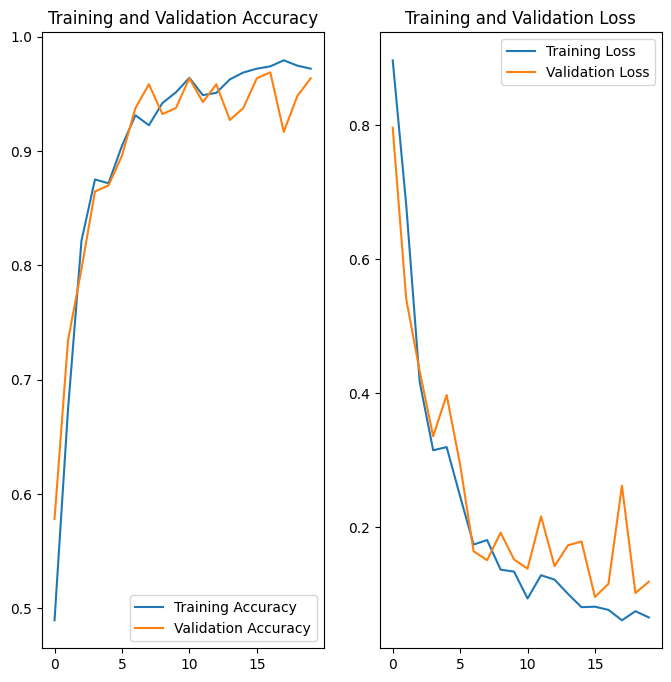

In [17]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 300ms/step
predicted label: Potato___Early_blight


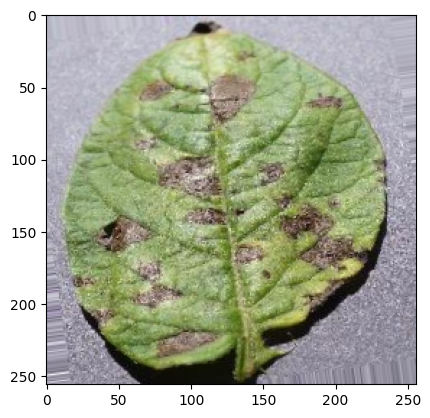

In [27]:
import numpy as np
for image_batch, labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 44ms/step


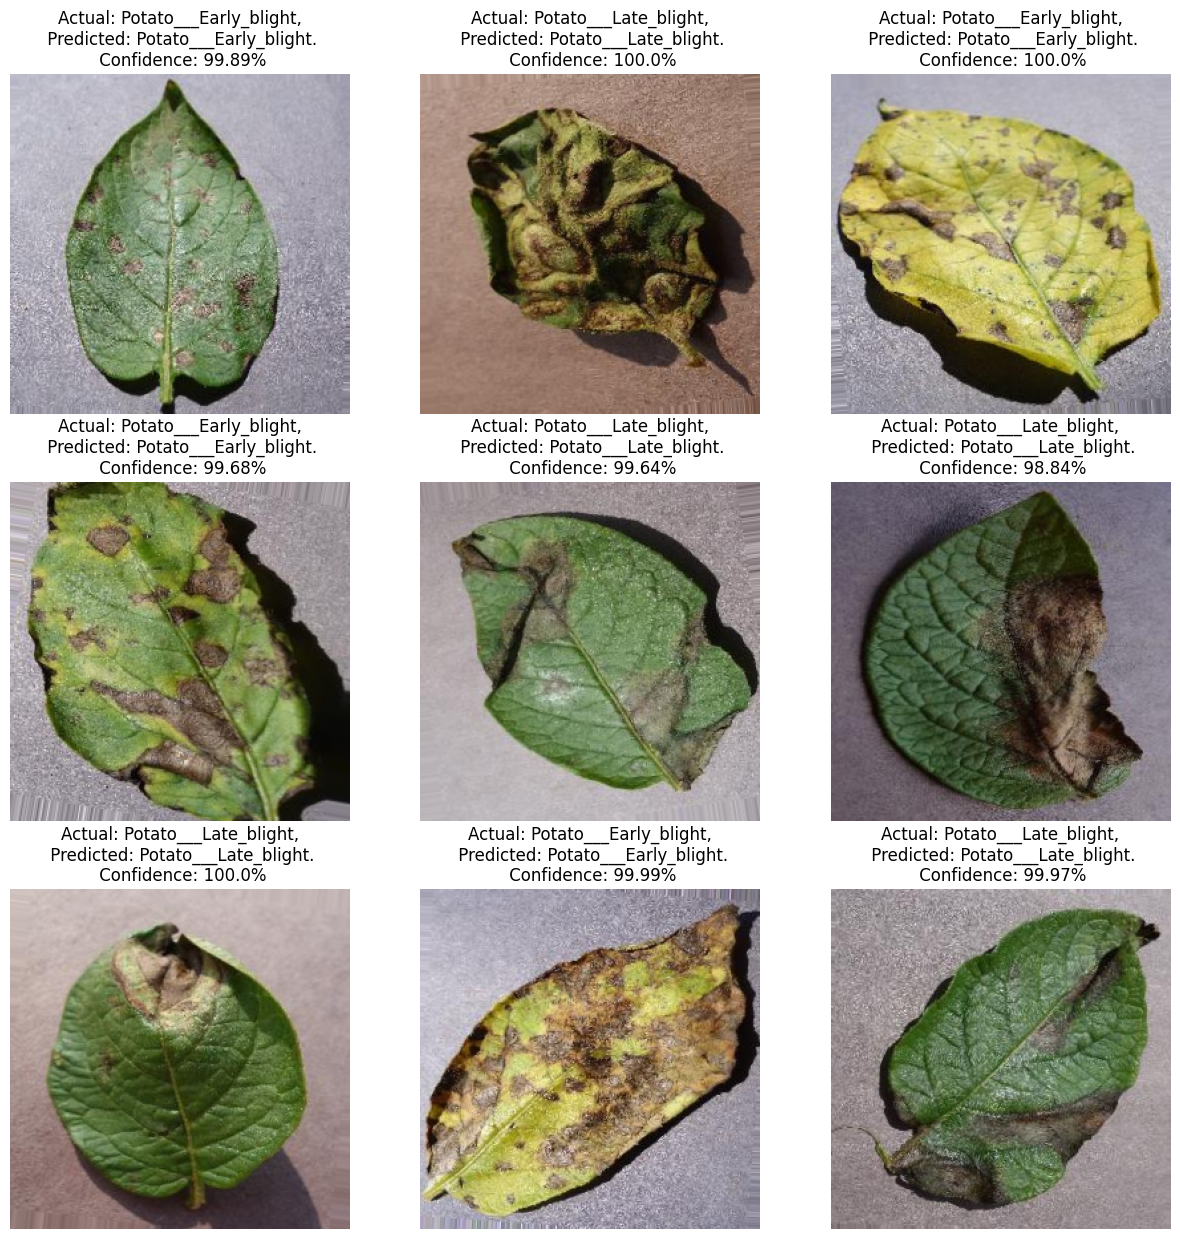

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [31]:
model.save("../m3.keras")